In [11]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal

In [12]:
Nx, Ny, Nz = 64, 1, 64
et = 1
N = 1

def load(Nx,Ny,Nz,et):
    N = 1
    base_fn = 'output_bal_swe'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

0.0
comp: comp
comp: comp
comp: comp
comp: comp
comp: comp
comp: comp
0.0


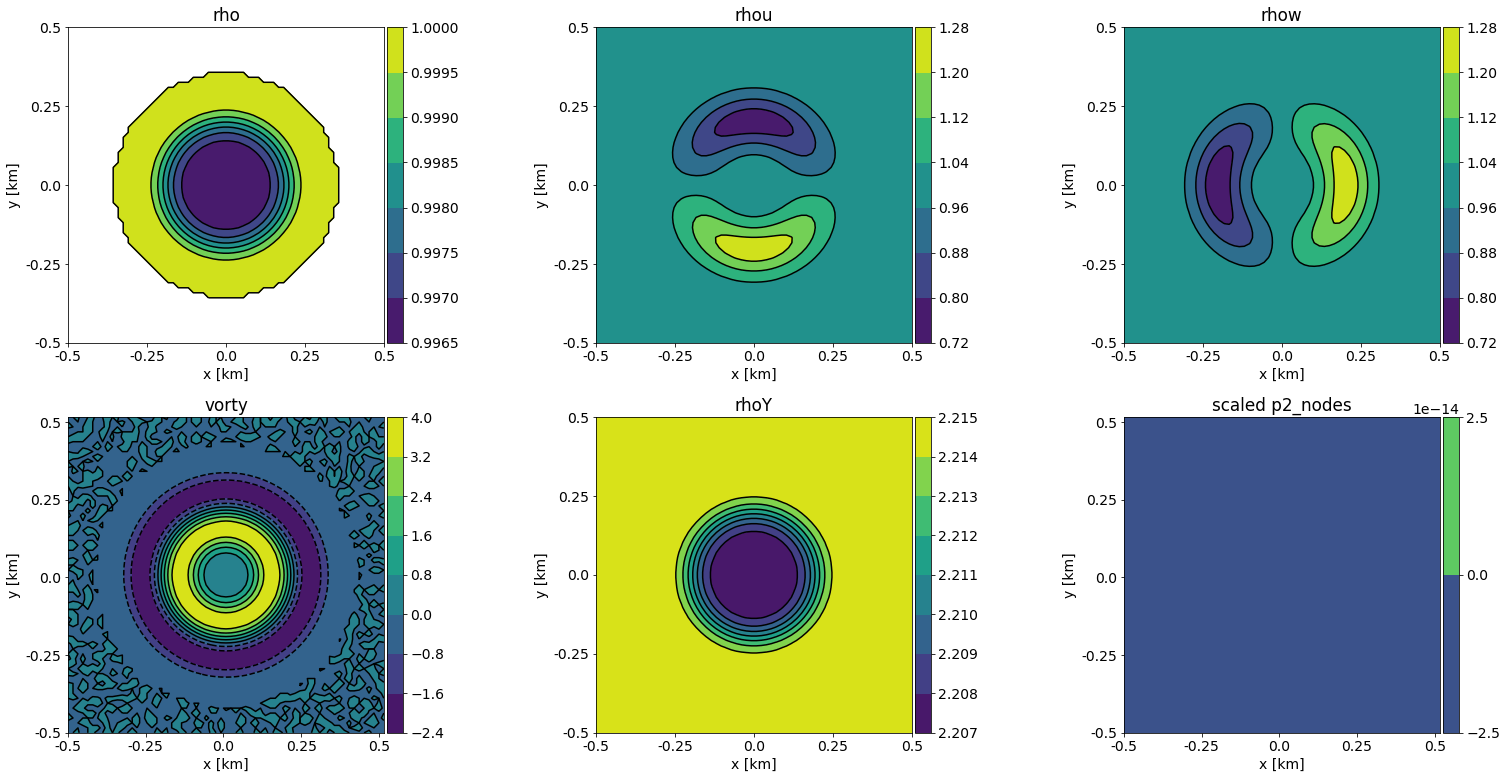

In [13]:
comp_sfx = 'comp'
# comp_sfx = 'pi'
# comp_sfx += '_corr'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhow','vorty','rhoY','p2_nodes']

t_lbl = 'TIME'
slc = 0

times = [0.75]
times = [1.0]
tag = tags[9]
times = [0.0]
tag = 'ic'

arr_lst = []

class oo(object):
    def __init__(self):
        None

if comp_sfx == 'comp':
    oo_comp = oo()
else:
    oo_pi = oo()
            
for tt,time in enumerate(times):
    print(time)
    for atr_idx, attribute in enumerate(attributes):
        
        arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=True, avg=False)[0][:,slc,:]
        arr = arr.T
        
        if comp_sfx == 'comp' or comp_sfx == 'comp_corr':
            print("comp:" ,comp_sfx)
            setattr(oo_comp,attribute,arr)
        else:
            print("pi", comp_sfx)
            setattr(oo_pi,attribute,arr)
            
        if attribute == 'p2_nodes':
            diff = arr.max() - arr.min()
            print(diff)
            arr -= arr.min()
            
            arr *= diff
            
            arr_lst.append([arr,"scaled %s" %attribute])
        else:
            arr_lst.append([arr,attribute])
            
            
        arr = [arr,attribute]

pl = pt.plotter(arr_lst,ncols=3,figsize=(22,12),sharey=False)
# lvls = np.arange(-0.45,1.7,0.1)
lvls = np.arange(-11.0,11.1,2)
# lvls = np.arange(H-60,H+42,2)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')

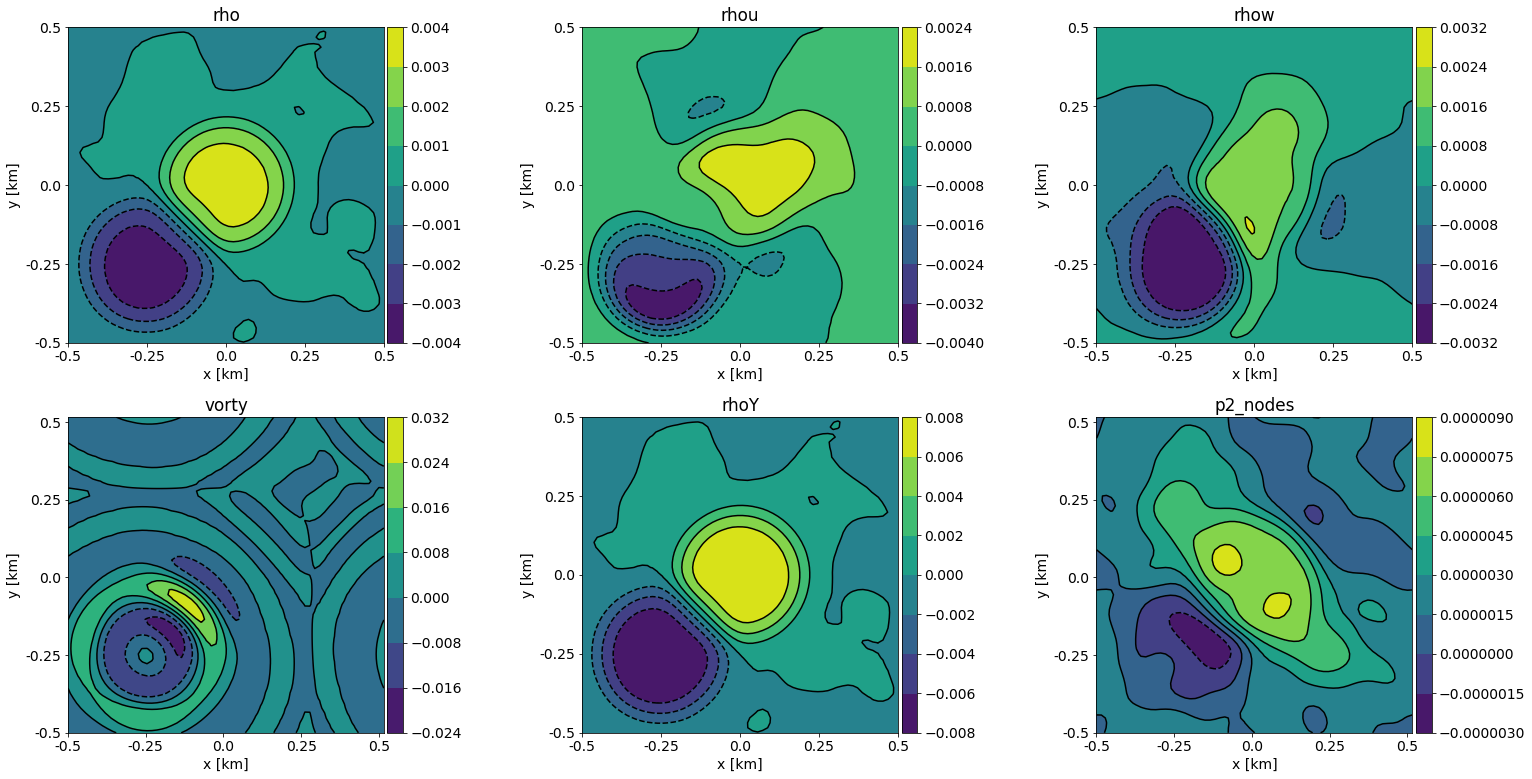

In [86]:
arr_lst = []
for atr_idx, attribute in enumerate(attributes):

    arr_comp = getattr(oo_comp,attribute)
    arr_pi = getattr(oo_pi,attribute)
    
    arr = arr_comp - arr_pi

    arr_lst.append([arr,attribute])

    arr = [arr,attribute]

pl = pt.plotter(arr_lst,ncols=3,figsize=(22,12),sharey=False)
# lvls = np.arange(-0.45,1.7,0.1)
lvls = np.arange(-11.0,11.1,2)
# lvls = np.arange(H-60,H+42,2)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Nz-1,5)
x_label = r'x [km]'
y_label = r'y [km]'

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(aspect='equal',method='contour')